# Part 2 and Part 3

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor # Extreme Gradient Boosting
from sklearn.metrics import roc_auc_score, fbeta_score, accuracy_score, precision_score, recall_score
import xgboost as xgb
from sklearn.impute import SimpleImputer
from Clean import reduce_component,model_k,preprocess, reg_model

In [2]:
mailout_train = pd.read_csv('Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
X = mailout_train.drop('RESPONSE',axis=1)
y = mailout_train['RESPONSE']
df_mailout_train  = preprocess(X)
pca_X_df = reduce_component(df_mailout_train)
prediction_cluster = model_k.predict(pca_X_df)

df_mailout_train['Cluster']=prediction_cluster
#----------------------------------

# df_columns = list(df_mailout_train.columns.values)
# scale = StandardScaler(copy=False)
# scaled = scale.fit_transform(df_mailout_train)
# df_mailout_train = pd.DataFrame(scaled,columns= df_columns)

#---------------------------------------
X_train, X_val, y_train, y_val = train_test_split(df_mailout_train, y, stratify=y, test_size=0.2, random_state=42)


/Users/maitreytalware/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape after corr (42962, 355)
shape after one-hot (42962, 402)
shape after scaling (42962, 402)
0.9581928707606845


In [3]:
#preds = reg_model.fit(X_train,y_train)
predictions_test = reg_model.predict(X_val)
print(roc_auc_score(y_val, predictions_test))

0.7905931602384112


## Feature Importance

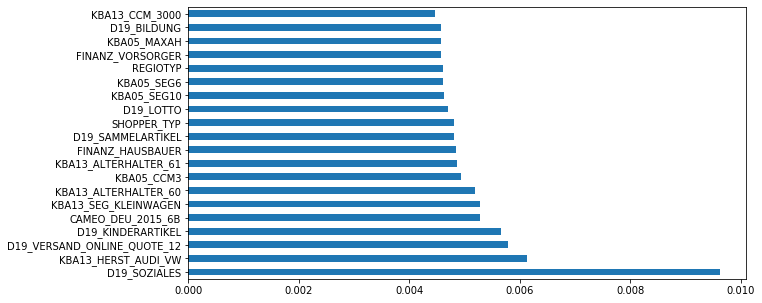

In [4]:
plt.figure(figsize=(10,5))
feat_importances = pd.Series(reg_model.feature_importances_, index=df_mailout_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**We can see top important feautures**

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [5]:
mailout_test = pd.read_csv('Udacity_MAILOUT_052018_TEST.csv', sep=';')
mailout_test_clean = preprocess(mailout_test)
#--------------------
pca_X_df = reduce_component(mailout_test_clean)
prediction_cluster = model_k.predict(pca_X_df)
mailout_test_clean['Cluster']=prediction_cluster
#--------------------------------
prediction_for_kaggle = reg_model.predict(mailout_test_clean)
df_kaggle = pd.DataFrame(index=mailout_test['LNR'].astype('int32'), data=prediction_for_kaggle)
df_kaggle.rename(columns={0: "RESPONSE"}, inplace=True)

#df_kaggle.to_csv('submission_best2.csv')

/Users/maitreytalware/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape after corr (42833, 355)
shape after one-hot (42833, 402)
shape after scaling (42833, 402)
0.9580194832216175


In [6]:
df_kaggle.head()

,RESPONSE
LNR,
1754,0.034087
1770,0.039039
1465,0.007111
1470,0.010175
1478,0.014318


# Current Kaggle Rank : 5

## Score 0.80846

<img src='Images/Rank1.png'></img>

<img src='Images/Rank.png'></img>